Предоставленная программа представляет собой скрипт **Python**, который имитирует компьютерную сеть с различными устройствами, такими как **маршрутизаторы**, **коммуникаторы** и **компьютеры**. Он назначает уровни безопасности для каждого устройства и устанавливает соединения между ними для формирования сети. Затем программа вычисляет и отображает общую надежность сети.

Теперь давайте разберем каждую часть кода:

1. **create_network():** эта функция создает пустой ориентированный граф, используя **NetworkX** для представления компьютерной сети. Он добавляет узлы для разных устройств и устанавливает их уровни безопасности. Он также устанавливает соединения между устройствами и подключает маршрутизатор к Интернету и глобальной сети.

2. **calculate_reliability(G):** эта функция принимает сетевой граф **G** в качестве входных данных. Он извлекает уровни безопасности каждого устройства и рассчитывает надежность каждого устройства на основе его уровня безопасности. Затем он вычисляет общую надежность всей сети, умножая надежность отдельных устройств.

3. **visualize_network(G):** эта функция визуализирует граф компьютерной сети с помощью **NetworkX** и **Matplotlib**. Он настраивает график, назначает цвета узлам в зависимости от их уровней безопасности и рисует сетевой график. Он также добавляет цветную полосу для обозначения уровней безопасности узлов.

4. **plot_network_quality(overall_reliability):** эта функция отображает общее качество сети (**надежность**) в виде гистограммы. Он принимает общую надежность в качестве входных данных и отображает ее в виде одного столбца на диаграмме.

5. **main():** основная функция является точкой входа скрипта. Он вызывает **create_network()** для создания графа сети, **visualize_network()** для визуализации сети и **calculate_reliability()** для расчета общей надежности сети. Наконец, он отображает общую надежность сети и гистограмму, представляющую качество сети.

Программа сначала создает сеть, затем визуализирует ее и, наконец, вычисляет и отображает общую надежность сети в виде десятичного значения. Кроме того, он отображает качество сети в виде гистограммы. Уровни безопасности, назначенные каждому устройству, и соединения между ними можно настроить для представления различных сетевых сценариев.

<ipython-input-13-e1e68b2d936c>:68: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Уровень безопасности')


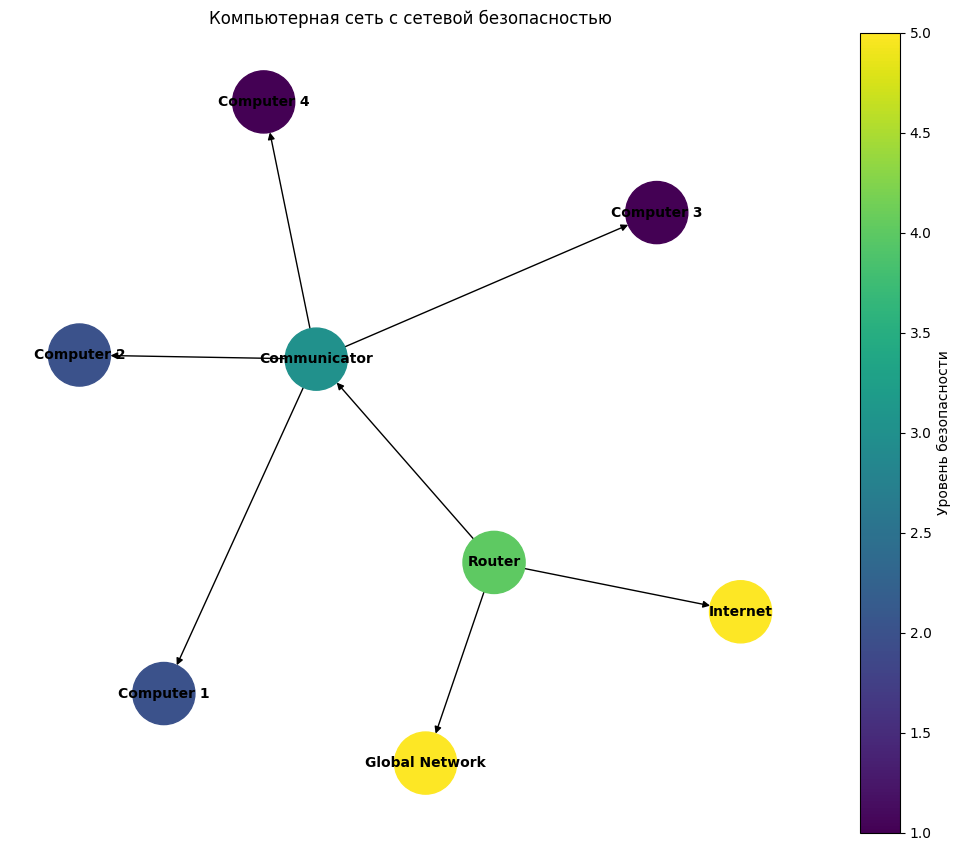

Общая надежность сети: 0.00


In [13]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def create_network():
    # Создайте пустой ориентированный граф для представления сети
    G = nx.DiGraph()

    # Добавляйте устройства в сеть с уровнями безопасности
    devices = {
        'Router': 4,
        'Communicator': 3,
        'Computer 1': 2,
        'Computer 2': 2,
        'Computer 3': 1,
        'Computer 4': 1,
    }
    for device, security_level in devices.items():
        G.add_node(device, security_level=security_level)

    # Добавить соединения между устройствами
    connections = [('Router', 'Communicator'), ('Communicator', 'Computer 1'), ('Communicator', 'Computer 2'),
                   ('Communicator', 'Computer 3'), ('Communicator', 'Computer 4')]
    G.add_edges_from(connections)

    # Добавьте узлы Интернета и глобальной сети с уровнями безопасности
    G.add_node('Internet', security_level=5)
    G.add_node('Global Network', security_level=5)

    # Подключаем роутер к интернету и глобальной сети
    G.add_edge('Router', 'Internet')
    G.add_edge('Router', 'Global Network')

    return G

def calculate_reliability(G):
    # Получите уровни безопасности для всех устройств
    security_levels = nx.get_node_attributes(G, 'security_level')

    # Рассчитать надежность каждого устройства
    device_reliability = {device: 1 / (1 + security_levels[device]) for device in G.nodes()}

    # Рассчитать общую надежность сети
    overall_reliability = np.prod(list(device_reliability.values()))

    return overall_reliability

def visualize_network(G):
    # Настроить сюжет
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 8))

    # Получите уровни безопасности для всех устройств
    security_levels = nx.get_node_attributes(G, 'security_level')
    node_colors = [security_levels[node] for node in G.nodes()]

    # Нарисуйте сетевой граф с цветами узлов в зависимости от уровней безопасности.
    cmap = plt.cm.viridis
    vmin, vmax = min(node_colors), max(node_colors)
    norm = mcolors.Normalize(vmin=vmin, vmax=vmax)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color=node_colors, cmap=cmap,
            font_size=10, font_weight='bold')

    # Нарисуйте цветную полосу для уровней безопасности
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Уровень безопасности')

    # Show the plot
    plt.title('Компьютерная сеть с сетевой безопасностью')
    plt.axis('off')
    plt.show()

def plot_network_quality(overall_reliability):
    # Настроить сюжет
    plt.figure(figsize=(8, 5))

    # Постройте качество сети в виде гистограммы
    plt.bar(['Качество сети'], [overall_reliability], color='teal', width=0.5)

    # Установите ограничение по оси Y, чтобы оно соответствовало диапазону значений надежности.
    plt.ylim(0, 1)

    # Добавьте ярлыки и заголовок
    plt.xlabel('Сеть')
    plt.ylabel('Качество')
    plt.title('Качество сети')

    # Показать сюжет
    plt.show()

def main():
    # Создайте сеть
    network = create_network()

    # Визуализируйте сеть
    visualize_network(network)

    # Расчет и отображение общей надежности сети
    overall_reliability = calculate_reliability(network)
    print(f"Общая надежность сети: {overall_reliability:.2f}")

if __name__ == "__main__":
    main()